# ウォークフォワード法によるARIMAモデルの予測

In [1]:
# ブログ掲載 https://datapowernow.hatenablog.com/entry/2021/01/12/174531
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='MS Gothic'
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# データセットの読み込み
# https://www.kaggle.com/bulentsiyah/for-simple-exercises-time-series-forecasting
df1 = pd.read_csv('Alcohol_Sales.csv',index_col=0,parse_dates=True)
df2 = df1.rename(columns={'S4248SM144NCEN':'alcohol_sales'})
df2.head()

,alcohol_sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [3]:
# 訓練データ(2/3)とテストデータ(1/3)に分ける
X = df2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train] # モデル当てはめデータの作成
predictions = list() # 空リスト

In [4]:
# ウォークフォワード法
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat) # 予測値をリストに加える
    obs = test[t]
    history.append(obs) # 観測値データを1時点追加する
    history = history[1:len(history)] # 観測値データの先頭を削除する
#	print('predicted=%f, expected=%f' % (yhat, obs))

In [5]:
# 予測誤差の評価
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1424.737


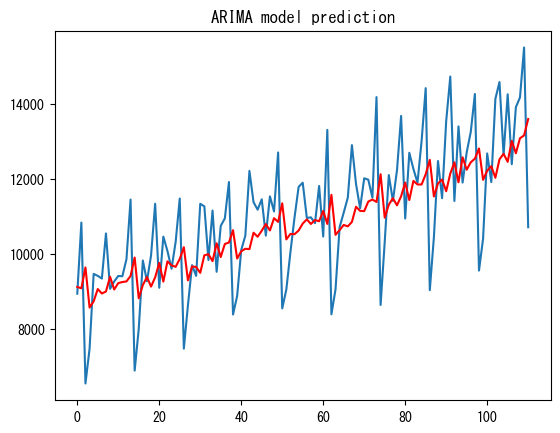

In [6]:
# 実績値と予測値のプロット
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('ARIMA model prediction')
plt.show()